Random Forest Models

In [46]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# load data
file_name = os.path.join(os.getcwd(), "final_dataset.csv")
df = pd.read_csv(file_name, header=0)

df.head()

,State,County,Week,cases_per_100K_7_day_count_change,Avg Temp,Temp Flux,Pandemic Indicator
0,Alabama,Autauga,2022-10-20,53.70,14.82,-0.24,0
1,Alabama,Autauga,2022-10-27,50.12,14.58,-0.24,0
2,Alabama,Autauga,2022-11-03,55.49,16.88,2.30,0
3,Alabama,Autauga,2022-11-10,107.39,19.69,2.81,1
4,Alabama,Autauga,2022-11-17,37.59,10.04,-9.65,0


In [48]:
# Definding features and labels
y = df['Pandemic Indicator']
X = df[['Avg Temp']]

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [49]:
def train_test_rf(X_train, X_test, y_train, y_test, n):
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

    acc_score = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    return acc_score, cm, roc_auc, y_prob


In [50]:
n_values = [6**i for i in range(5)]
acc = []

for n in n_values:
    score, cm, roc_auc, y_prob = train_test_rf(X_train, X_test, y_train, y_test, n)
    print(f'n={n}, Accuracy: {score:.2f}, AUC: {roc_auc:.2f}')
    acc.append((n, score)) 
accuracy_scores = [x[1] for x in acc]


n=1, Accuracy: 0.55, AUC: 0.57
n=6, Accuracy: 0.56, AUC: 0.58
n=36, Accuracy: 0.56, AUC: 0.59
n=216, Accuracy: 0.57, AUC: 0.59
n=1296, Accuracy: 0.56, AUC: 0.59


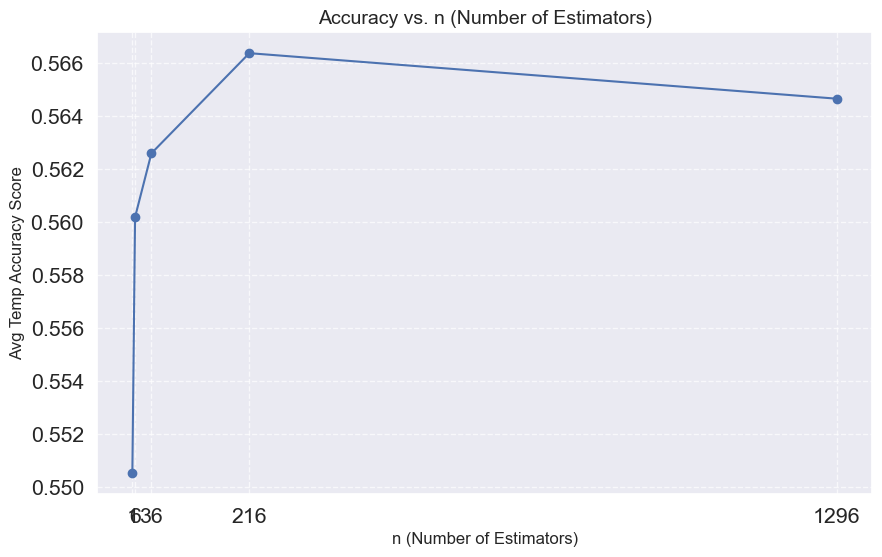

In [51]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. n (Number of Estimators)', fontsize=14)
plt.xlabel('n (Number of Estimators)', fontsize=12)
plt.ylabel('Avg Temp Accuracy Score', fontsize=12)
plt.xticks(n_values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

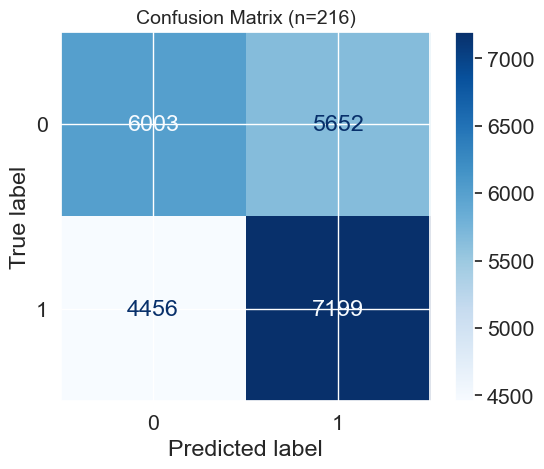

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

# Use one value of n for the confusion matrix
best_n, best_acc = max(acc, key=lambda x: x[1])
_, cm, _, _ = train_test_rf(X_train, X_test, y_train, y_test, best_n)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (n={best_n})', fontsize=14)
plt.show()


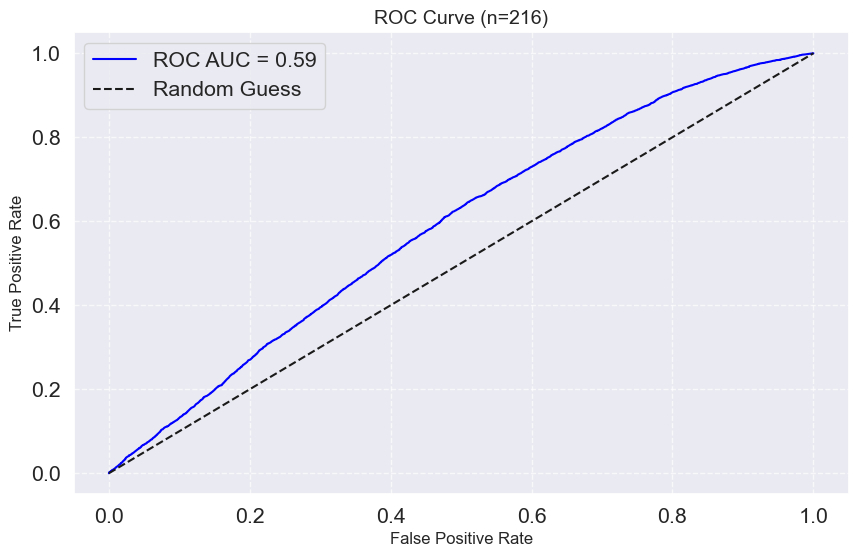

In [53]:
# Calculate ROC Curve
_, _, roc_auc, y_prob = train_test_rf(X_train, X_test, y_train, y_test, best_n)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title(f'ROC Curve (n={best_n})', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Temp Flux

In [54]:
# Definding features and labels
y1 = df['Pandemic Indicator']
X1 = df[['Temp Flux']]

# Splitting dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [55]:
n_values = [6**i for i in range(5)]
acc = []

for n in n_values:
    score, cm, roc_auc, y_prob = train_test_rf(X1_train, X1_test, y1_train, y1_test, n)
    print(f'n={n}, Accuracy: {score:.2f}, AUC: {roc_auc:.2f}')
    acc.append((n, score)) 
accuracy_scores = [x[1] for x in acc]

n=1, Accuracy: 0.53, AUC: 0.55
n=6, Accuracy: 0.53, AUC: 0.55
n=36, Accuracy: 0.53, AUC: 0.55
n=216, Accuracy: 0.53, AUC: 0.55
n=1296, Accuracy: 0.53, AUC: 0.55


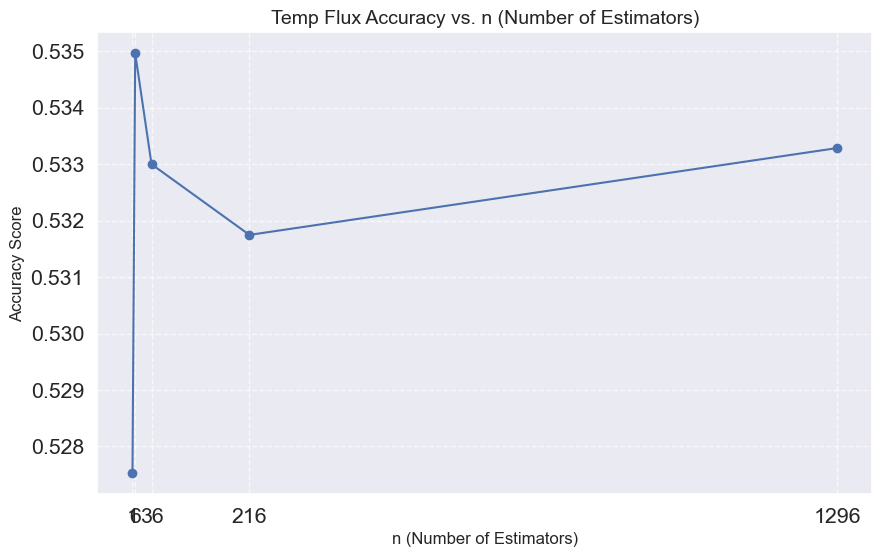

In [56]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Temp Flux Accuracy vs. n (Number of Estimators)', fontsize=14)
plt.xlabel('n (Number of Estimators)', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xticks(n_values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

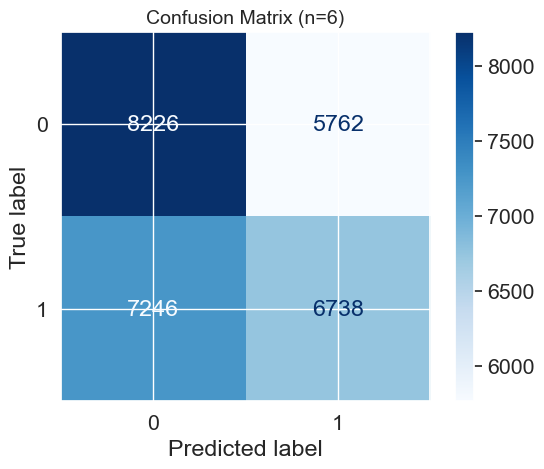

In [57]:
# Use one value of n for the confusion matrix
best_n, best_acc = max(acc, key=lambda x: x[1])
_, cm, _, _ = train_test_rf(X1_train, X1_test, y1_train, y1_test, best_n)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (n={best_n})', fontsize=14)
plt.show()


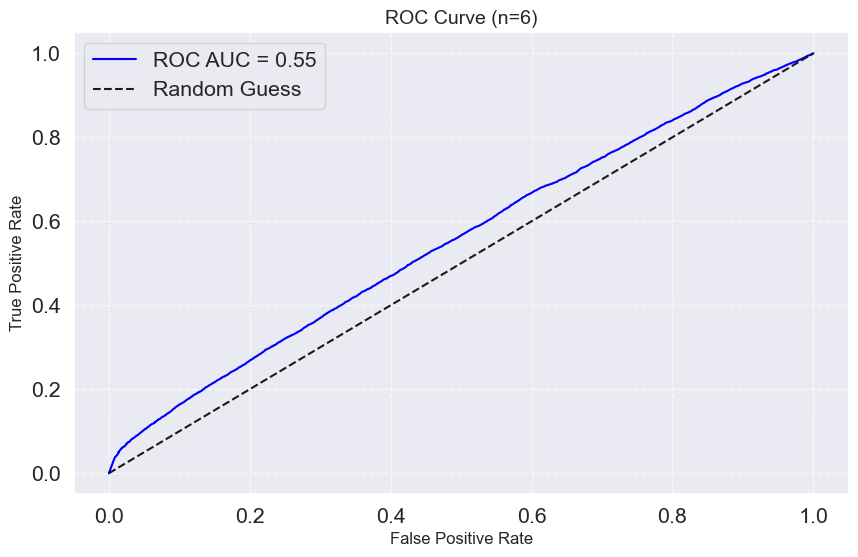

In [59]:
# Calculate ROC Curve
_, _, roc_auc, y_prob = train_test_rf(X1_train, X1_test, y1_train, y1_test, best_n)
fpr, tpr, thresholds = roc_curve(y1_test, y_prob)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title(f'ROC Curve (n={best_n})', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
